# HW02 — Табличные данные, контроль качества, EDA и визуализация

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Загрузка учебного датасета
# (ВЫПОЛНЕНИЕ п. 2.3.1 — загрузка данных)
df = pd.read_csv("S02-hw-dataset.csv")

# Первичный осмотр
# (ВЫПОЛНЕНИЕ п. 2.3.1 — head)
df.head()

,user_id,age,country,purchases,revenue
0,1,25.0,FR,7,749
1,2,24.0,RU,5,1115
2,3,52.0,FR,7,399
3,4,31.0,RU,6,654
4,5,NaN,DE,6,1296


In [2]:
# Информация о данных
# (ВЫПОЛНЕНИЕ п. 2.3.1 — info)
df.info()

print("\nОписательные статистики:")
# (ВЫПОЛНЕНИЕ п. 2.3.1 — describe)
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   user_id    41 non-null     int64  
 1   age        39 non-null     float64
 2   country    41 non-null     object 
 3   purchases  41 non-null     int64  
 4   revenue    41 non-null     int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.7+ KB

Описательные статистики:


,user_id,age,purchases,revenue
count,41.000000,39.000000,41.000000,41.000000
mean,20.243902,36.512821,4.829268,820.048780
std,11.659289,18.304259,2.710189,613.127269
min,1.000000,5.000000,-1.000000,0.000000
25%,10.000000,24.000000,3.000000,432.000000
50%,20.000000,33.000000,5.000000,693.000000
75%,30.000000,45.500000,7.000000,1115.000000
max,40.000000,120.000000,11.000000,2475.000000


## Анализ пропусков, дубликатов и данных

In [8]:
# Доля пропусков в каждом столбце
# (ВЫПОЛНЕНИЕ п. 2.3.2 — пропуски)
df.isna().mean()



user_id      0.00000
age          0.04878
country      0.00000
purchases    0.00000
revenue      0.00000
dtype: float64

In [4]:
# Проверка дубликатов
# (ВЫПОЛНЕНИЕ п. 2.3.2 — дубликаты)
df[df.duplicated()]


,user_id,age,country,purchases,revenue
40,10,24.0,RU,7,511


In [9]:
# Поиск подозрительных значений
# (ВЫПОЛНЕНИЕ п. 2.3.2 — нахождение некорректных значений)

# Возраст <10 или >100
bad_age = df[(df["age"] < 10) | (df["age"] > 100)]
display(bad_age)

# Отрицательные покупки
negative_purchases = df[df["purchases"] < 0]
display(negative_purchases)

# Доход >0 при purchases == 0
revenue_incorrect = df[(df["purchases"] == 0) & (df["revenue"] > 0)]
display(revenue_incorrect)


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785
20,21,5.0,RU,8,1488


,user_id,age,country,purchases,revenue
5,6,120.0,FR,-1,785


,user_id,age,country,purchases,revenue


### Выявленные проблемы качества данных

1. Пропуски в столбце age у двух пользователей.
2. Некорректные возраста — 5 и 120 лет.
3. Отрицательное количество покупок (−1).
4. Один дубликат строки user_id=10.


## Частоты и группировки


In [10]:
# Частоты встречаемости стран
# (ВЫПОЛНЕНИЕ п. 2.3.3 — value_counts)
df["country"].value_counts()


country
RU    13
FR    12
US     8
DE     6
CN     2
Name: count, dtype: int64

In [11]:
# Группировка по странам: средний доход, сумма дохода,
# среднее число покупок
# (ВЫПОЛНЕНИЕ п. 2.3.3 — groupby + агрегаты)

df.groupby("country").agg({
    "revenue": ["mean", "sum"],
    "purchases": "mean"
})


revenue        purchases
                mean    sum      mean
country                              
CN       1054.000000   2108  4.500000
DE       1445.500000   8673  6.500000
FR        675.916667   8111  4.250000
RU        790.076923  10271  4.769231
US        557.375000   4459  4.625000

In [12]:
# Создание возрастных групп (bins)
# (ВЫПОЛНЕНИЕ п. 2.3.3 — добавление группировки по диапазонам)

bins = [0, 20, 30, 40, 50, 60, 150]
labels = ["0–20", "21–30", "31–40", "41–50", "51–60", "60+"]

df["age_group"] = pd.cut(df["age"], bins=bins, labels=labels)
df["age_group"].value_counts()


age_group
21–30    12
31–40    11
41–50     6
51–60     6
0–20      3
60+       1
Name: count, dtype: int64

### Основные выводы по EDA

- Больше всего пользователей из стран RU и FR.
- Доход в среднем выше у DE и US.
- Возрастные группы 21–30 и 31–40 — самые массовые.
- В разных странах сильно различается средний доход.


## Визуализация данных (histogram, boxplot, scatter)


In [13]:
# Создаём папку figures для сохранения графиков
# (ВЫПОЛНЕНИЕ п. 2.4 — подготовка директории)
import os
os.makedirs("figures", exist_ok=True)


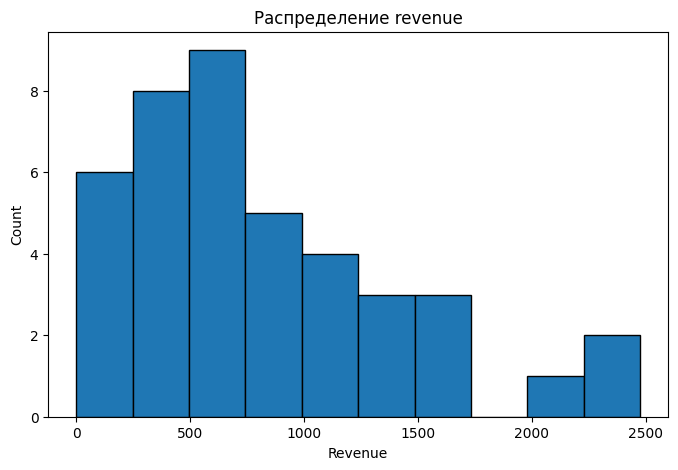

In [14]:
# Построение гистограммы revenue
# (ВЫПОЛНЕНИЕ п. 2.4 — histogram)
plt.figure(figsize=(8,5))
plt.hist(df["revenue"], bins=10, edgecolor="black")
plt.title("Распределение revenue")
plt.xlabel("Revenue")
plt.ylabel("Count")

# Сохранение графика
# (ВЫПОЛНЕНИЕ п. 2.4 — сохранение графика)
plt.savefig("figures/revenue_histogram.png", dpi=300)

plt.show()


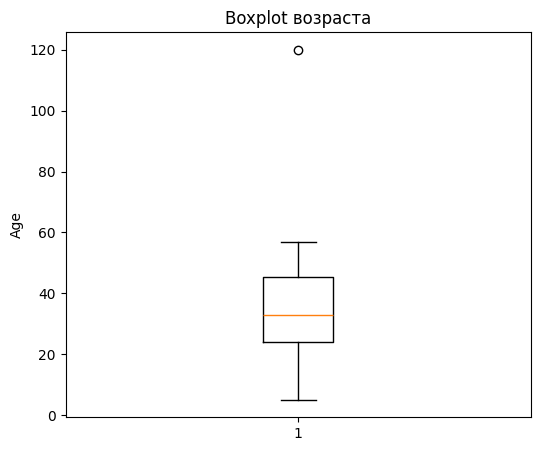

In [15]:
# Boxplot для возраста
# (ВЫПОЛНЕНИЕ п. 2.4 — boxplot)
plt.figure(figsize=(6,5))
plt.boxplot(df["age"].dropna())
plt.title("Boxplot возраста")
plt.ylabel("Age")
plt.show()


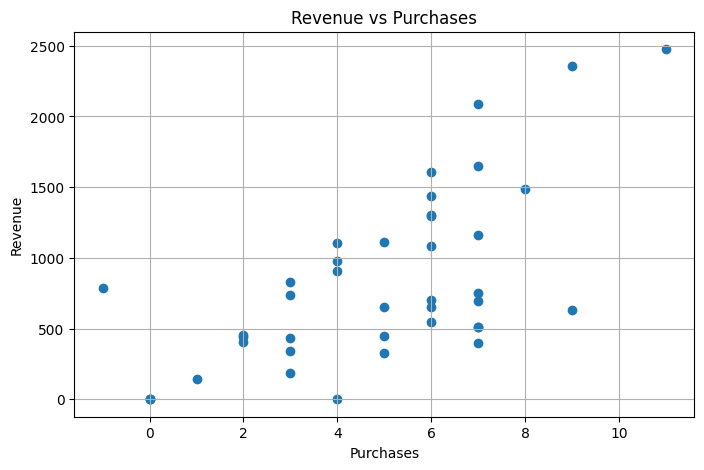

In [16]:
# Scatter plot: зависимость дохода от числа покупок
# (ВЫПОЛНЕНИЕ п. 2.4 — scatter)
plt.figure(figsize=(8,5))
plt.scatter(df["purchases"], df["revenue"])
plt.title("Revenue vs Purchases")
plt.xlabel("Purchases")
plt.ylabel("Revenue")
plt.grid(True)

# сохраняем график
plt.savefig("figures/revenue_vs_purchases.png", dpi=300)

plt.show()
